In [1]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import math
import random
import json

print("Modules loaded")

Modules loaded


In [2]:
def in_bounds(pos_vector_df, bounds):
    if pos_vector_df["Lat"].min() >= bounds[2] and pos_vector_df["Lat"].max() <= bounds[3]:
        if pos_vector_df["Long"].min() >= bounds[0] and pos_vector_df["Long"].max() <= bounds[1]:
            return True
    return False


def filter_pos_vector_df(pos_vector_df, bounds):
    # print(pos_vector)
    df = pd.DataFrame(pos_vector_df)
    in_bounds = (df["Lat"] >= bounds[2]) & (df["Lat"] <= bounds[3]) & (df["Long"] <= bounds[1]) & (df["Long"] >= bounds[0])
    # print(in_bounds)
    # # df = df[df[in_bounds]]

    return df[in_bounds]


def get_distance(coords):
    distance = 0
    for i in range(len(coords)):
        if i < len(coords) - 1:
            distance += math.sqrt((coords[i+1][1]-coords[i][1])**2+(coords[i+1][0]-coords[i][0])**2)
    return distance


In [3]:
flightDf = pd.read_json("./input/flight-vector.json")

fedDf = pd.read_json("./input/fed-list.json")

print(flightDf.head())
print(flightDf.size)

print(fedDf.head())
print(fedDf.size)

   FlightPathId  Rcvr  HasSig    Icao    Bad                FSeen  CMsgs  \
0      11352471   102   False  AD3997  False  08/05/2020 07:00:30      1   
1      11021170   102   False  A82B72  False  08/05/2020 07:00:29      1   
2      10796473   102   False  A4BDB9  False  08/05/2020 07:00:26      2   
3      10798030   102   False  A4C3CE  False  08/05/2020 07:00:26      3   
4      10669660   102   False  A2CE5C  False  08/05/2020 07:00:22      4   

      GAlt       InHg  AltT  ...  other_names_2  other_names_3  other_names_4  \
0      NaN  29.911417     0  ...           None           None           None   
1   3701.0  30.121063     0  ...           None           None           None   
2  15710.0  30.029528     0  ...           None           None           None   
3    671.0  29.940945     0  ...           None           None           None   
4  45085.0  30.029528     0  ...           None           None           None   

   other_names_5  expiration_date  unique_id  kit_mfr  k

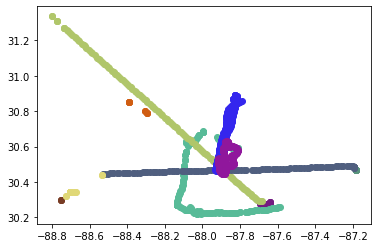

In [4]:
b_box = (-89, -87, 30, 32)

distances = []

for index, row in flightDf.iterrows():
    pos_vector_df = pd.DataFrame(row["pos_vector"])
    if in_bounds(pos_vector_df, b_box):
        long, lat = pos_vector_df["Long"], pos_vector_df["Lat"]
        longArr = long.to_numpy()
        latArr = lat.to_numpy()
        coords = np.stack((longArr, latArr), axis=1)

        distance = get_distance(coords)
        distances.append(distance)
        if distance < 1.8:

            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
            plt.scatter(longArr, latArr, color=color)

plt.show()
    



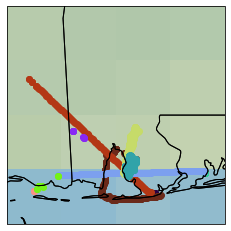

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(b_box, crs=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (8,8)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.STATES)

for index, row in flightDf.iterrows():
    pos_vector_df = pd.DataFrame(row["pos_vector"])
    if in_bounds(pos_vector_df, b_box):
        long, lat = pos_vector_df["Long"], pos_vector_df["Lat"]
        longArr = long.to_numpy()
        latArr = lat.to_numpy()
        coords = np.stack((longArr, latArr), axis=1)

        distance = get_distance(coords)
        distances.append(distance)
        if distance < 1.8:

            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
            plt.scatter(longArr, latArr, color=color)

plt.show()

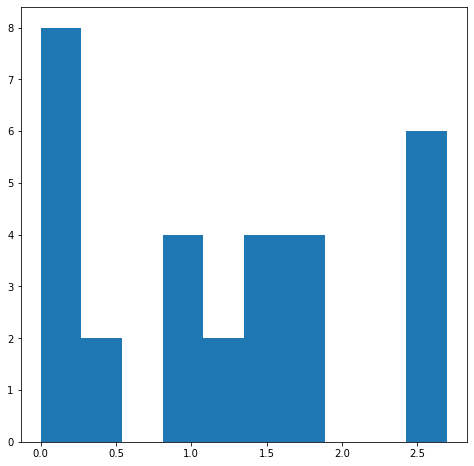

In [15]:
plt.hist(distances)
plt.show()

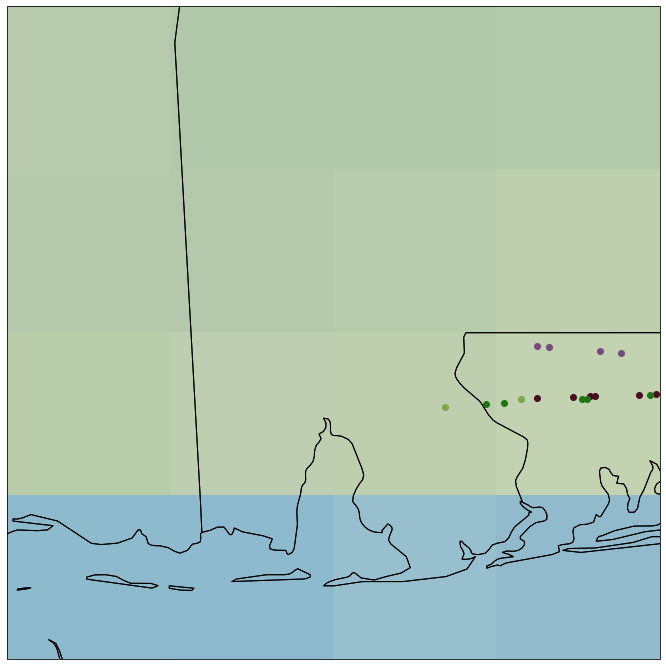

In [20]:
fedDistances = []
fedPosVector = fedDf["pos_vector"]

# b_box_fed = (-125, -65, 25, 50)
b_box = (-89, -87, 30, 32)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(b_box, crs=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (12, 12)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.STATES)

for index, row in fedDf.iterrows():
    fedPosVector = pd.DataFrame(row["pos_vector"])
    long, lat = fedPosVector["Long"], fedPosVector["Lat"]
    longArr = long.to_numpy()
    latArr = lat.to_numpy()
    coords = np.stack((longArr, latArr), axis=1)

    distance = get_distance(coords)
    fedDistances.append(distance)

    if distance < 1.8:
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        plt.scatter(longArr, latArr, color=color)
plt.show()

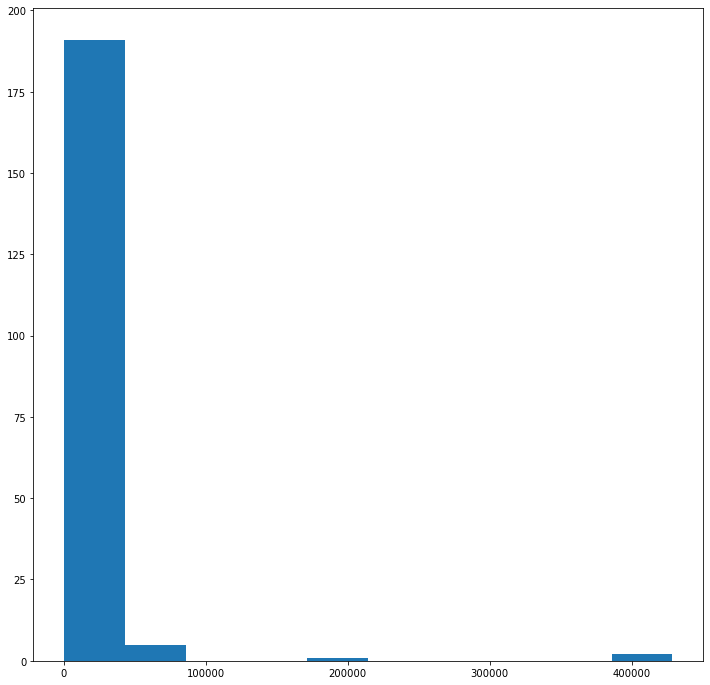

In [45]:
plt.hist(fedDistances)
plt.show()